# Importing the required libraries

In [8]:
import re
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Definition of Functions 

In [11]:
# Extract the Date time
def date_time(s):
    pattern='^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result=re.match(pattern, s)
    if result:
        return True
    return False 

# Extract contacts
def find_contact(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False
    
# Extract Message
def getMassage(line):
    splitline=line.split(' - ')
    datetime= splitline[0];
    date, time= datetime.split(', ')
    message=" ".join(splitline[1:])
    
    if find_contact(message):
        splitmessage=message.split(": ")
        author=splitmessage[0]
        message=splitmessage[1]
    else:
        author=None
    return date, time, author, message
    

In [12]:
data=[]
conversation='chat.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer=[]
    date, time, author= None, None, None
    while True:
        line=fp.readline()
        if not line:
            break
        line=line.strip()
        if date_time(line):
            if len(messageBuffer) >0:
                data.append([date, time, author, ''.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message=getMassage(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

# analyse the sentiments

In [13]:
df=pd.DataFrame(data, columns=["Date", "Time", "contact", "Message"])
df['Date']=pd.to_datetime(df['Date'])

data=df.dropna()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments=SentimentIntensityAnalyzer()
data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
data["negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
data["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["Message"]]

data.head()

C:\Users\Raj Krishna Mondal\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Raj Krishna Mondal\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Raj Krishna Mondal\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,Date,Time,contact,Message,positive,negative,neutral
0,2021-06-23,1:47 pm,+91 70255 94739,Hello,0.000,0.0,1.000
1,2021-06-23,1:47 pm,+91 70255 94739,Sir,0.000,0.0,1.000
2,2021-06-23,1:47 pm,+91 70255 94739,I called you morning,0.000,0.0,1.000
3,2021-06-23,1:47 pm,+91 70255 94739,Please share the bank details for payment,0.474,0.0,0.526
4,2021-06-23,1:48 pm,+91 70255 94739,I didn't see the deatails in acceptance mail,0.333,0.0,0.667


In [14]:
x=sum(data["positive"])
y=sum(data["negative"])
z=sum(data["neutral"])

def score(a,b,c):
    if (a>b) and (a>c):
        print("Positive ")
    if (b>a) and (b>c):
        print("Negative")
    if (c>a) and (c>b):
        print("Neutal")

score(x,y,z)

Neutal


In [15]:
df.contact.unique()

array(['+91 70255 94739', 'Raj', None], dtype=object)

In [33]:
media_messages = df[df['Message'] == 'Oke'].shape[0]
print(media_messages)

5


In [17]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

In [23]:
import regex
df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
df.head(50)

,Date,Time,contact,Message,emoji
0,2021-06-23,1:47 pm,+91 70255 94739,Hello,[]
1,2021-06-23,1:47 pm,+91 70255 94739,Sir,[]
2,2021-06-23,1:47 pm,+91 70255 94739,I called you morning,[]
3,2021-06-23,1:47 pm,+91 70255 94739,Please share the bank details for payment,[]
4,2021-06-23,1:48 pm,+91 70255 94739,I didn't see the deatails in acceptance mail,[]
5,2021-06-23,1:48 pm,Raj,it is mentioned in the registration form,[]
6,2021-06-23,1:48 pm,+91 70255 94739,Oke sire fine,[]
7,2021-06-23,1:49 pm,+91 70255 94739,Sir ist scopus index?,[]
8,2021-06-23,1:49 pm,Raj,yes,[]
9,2021-06-23,1:49 pm,+91 70255 94739,Paper published in the Springer web?,[]


In [26]:
total_emojis_list = list([a for b in df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

There are 2924 words in all the messages.


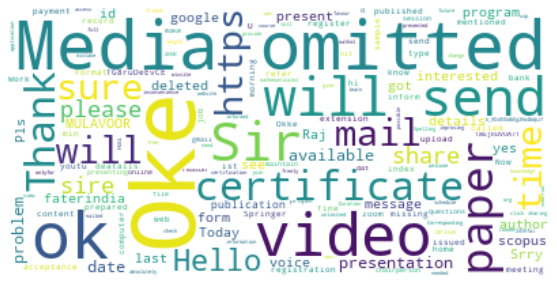

In [28]:
text = " ".join(review for review in df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()